In [69]:
import os
import tarfile
import urllib
import math
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import math
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import time
from sklearn.model_selection import GridSearchCV
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [70]:
fetch_housing_data()

In [71]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [72]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [73]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [74]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [75]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


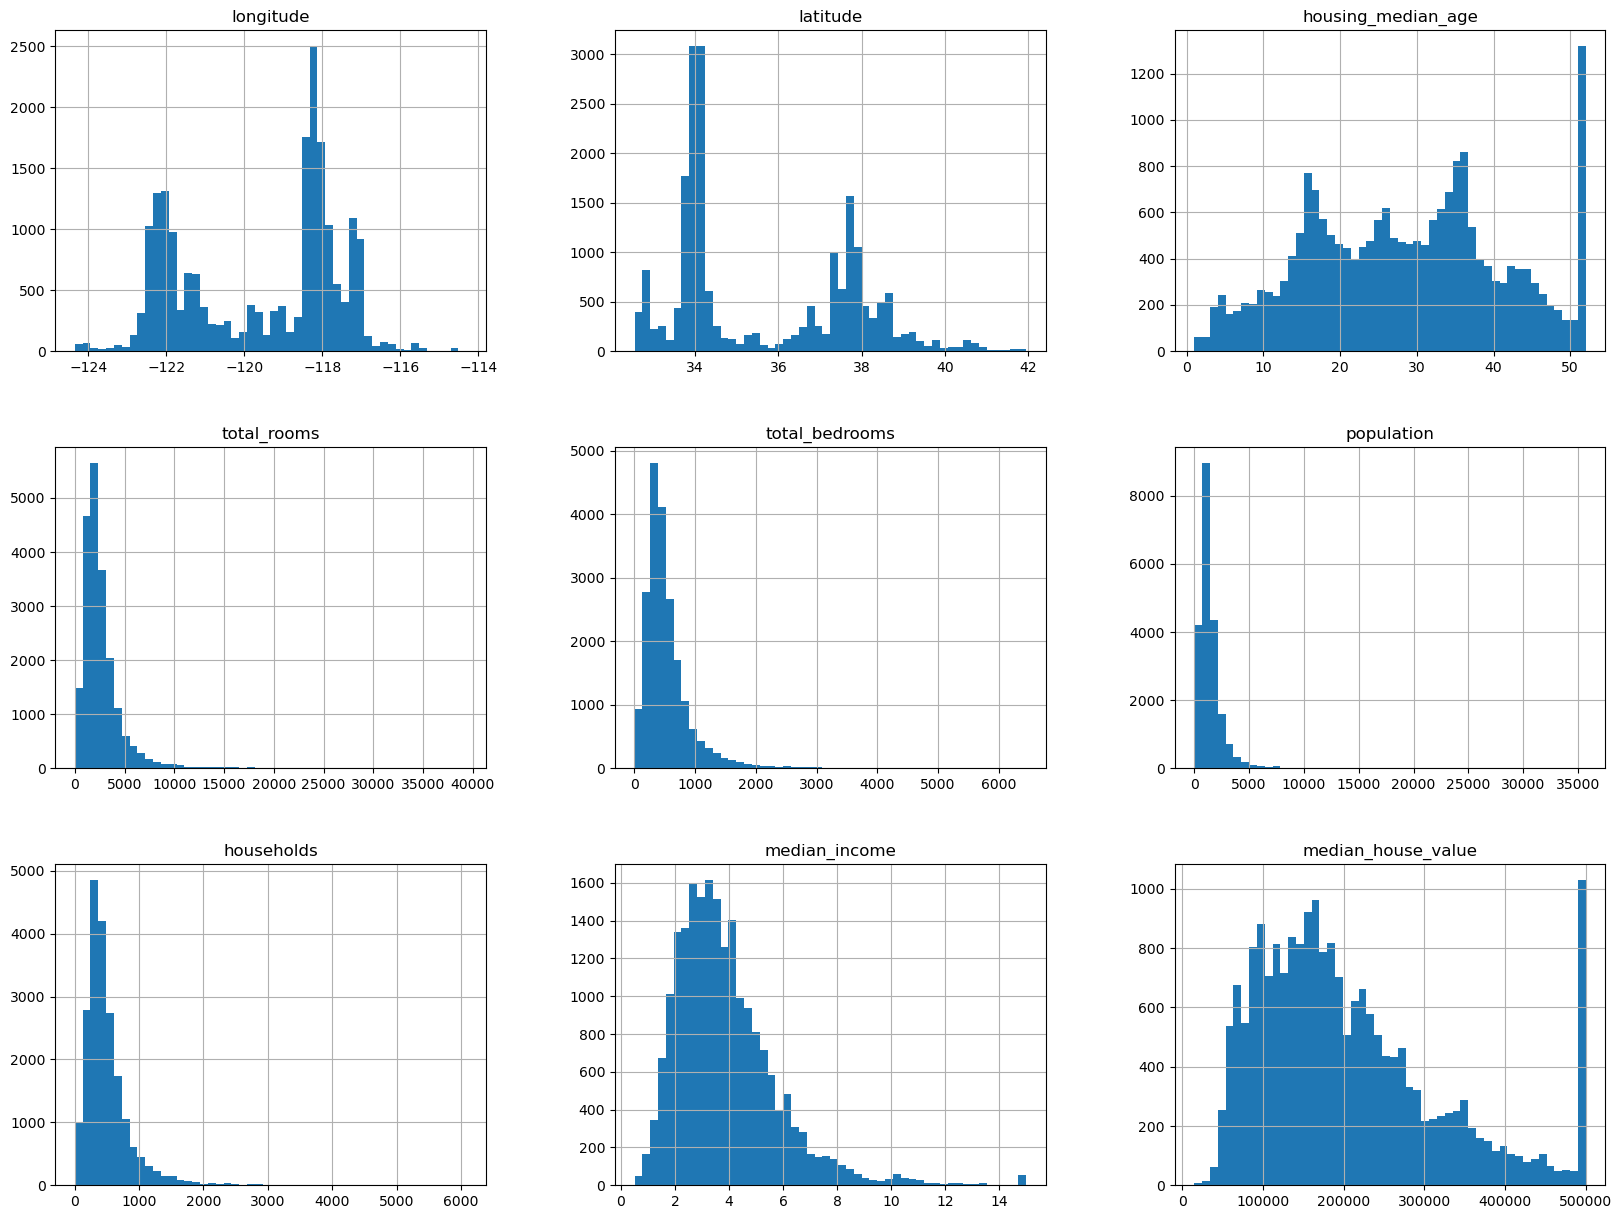

In [76]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

<Axes: >

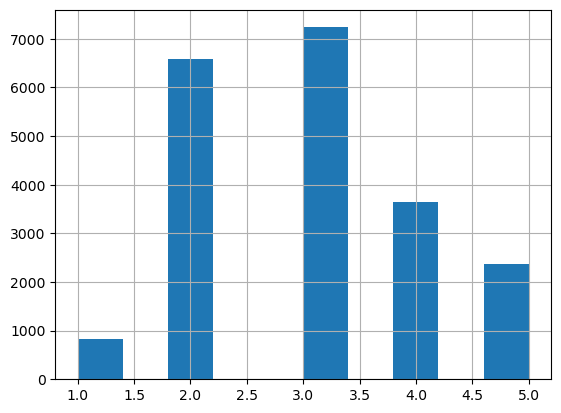

In [77]:
housing["income_cat"] = pd.cut(housing["median_income"],
                              bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels=[1, 2, 3, 4, 5])
housing["income_cat"].hist()

In [78]:
#split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
#for train_index, test_index in split.split(housing, housing["income_cat"]):
#    strat_train_set = housing.loc[train_index]
#    strat_test_set = housing.loc[test_index]

In [79]:
#strat_test_set["income_cat"].value_counts() / len(strat_test_set)

In [80]:
#strat_train_set["income_cat"].value_counts() / len(strat_train_set)

In [81]:
#housing["income_cat"].value_counts() / len(housing)

In [82]:
#for set_ in (strat_train_set, strat_test_set):
#    set_.drop("income_cat", axis=1, inplace=True)

In [83]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [84]:
for set_ in (train_set, test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [85]:
housing = train_set.copy()

In [86]:
#housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

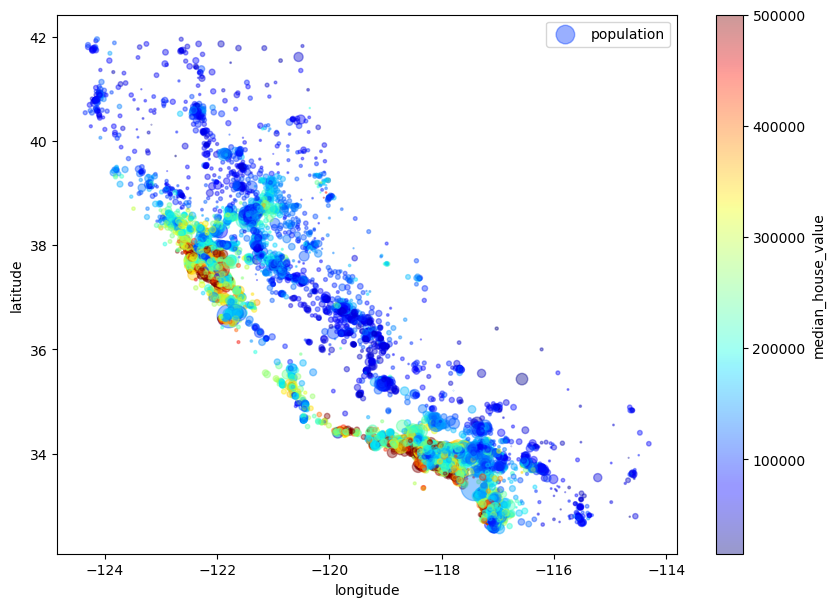

In [87]:
housing_plot = housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
                            s=housing["population"]/100, label="population", figsize=(10,7),
                            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
                            )
#housing_plot.get_figure().savefig('housing_plot.pdf')
housing_plot
#plt.legend()

In [88]:
corr_matrix = housing.corr()

/tmp/ipykernel_5087/2466220658.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


In [89]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

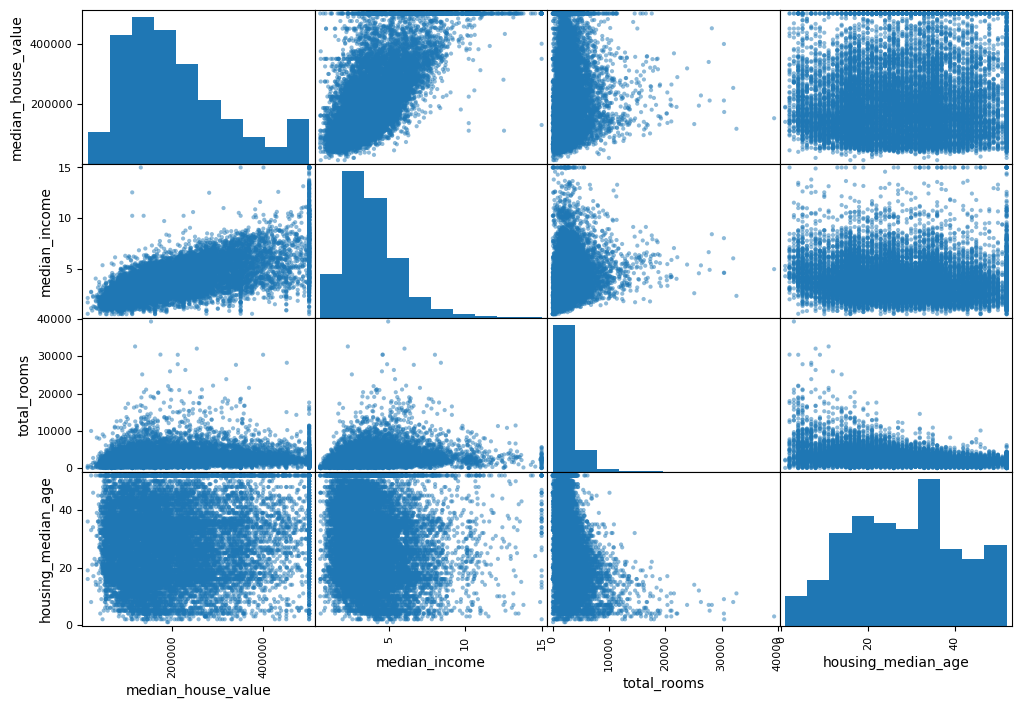

In [90]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

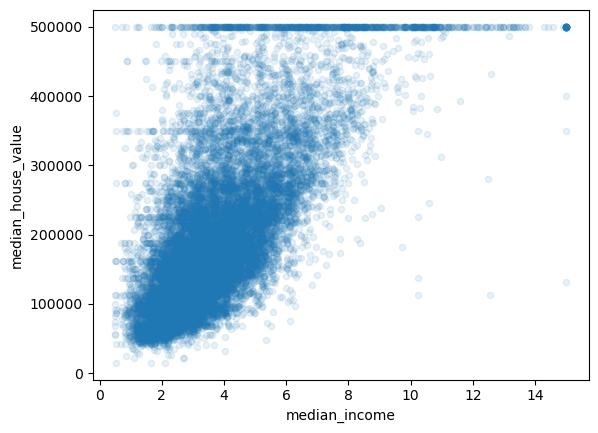

In [91]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [92]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [93]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

/tmp/ipykernel_5087/826279322.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value          1.000000
median_income               0.690647
rooms_per_household         0.158485
total_rooms                 0.133989
housing_median_age          0.103706
households                  0.063714
total_bedrooms              0.047980
population_per_household   -0.022030
population                 -0.026032
longitude                  -0.046349
latitude                   -0.142983
bedrooms_per_room          -0.257419
Name: median_house_value, dtype: float64

In [94]:
housing = train_set.drop("median_house_value", axis=1)
housing_labels = train_set["median_house_value"].copy()

In [95]:
#housing = strat_train_set.drop("median_house_value", axis=1)
#housing_labels = strat_train_set["median_house_value"].copy()

In [96]:
imputer = SimpleImputer(strategy="median")

In [97]:
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2129.    ,  437.    , 1167.    ,
        410.    ,    3.5458])

In [98]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2129.    ,  437.    , 1167.    ,
        410.    ,    3.5458])

In [99]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                         index=housing_num.index)

In [100]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
14196,NEAR OCEAN
8267,NEAR OCEAN
17445,NEAR OCEAN
14265,NEAR OCEAN
2271,INLAND
17848,<1H OCEAN
6252,<1H OCEAN
9389,NEAR BAY
6113,<1H OCEAN
6061,<1H OCEAN


In [101]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[4.],
       [4.],
       [4.],
       [4.],
       [1.],
       [0.],
       [0.],
       [3.],
       [0.],
       [0.]])

In [102]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [103]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [104]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [105]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [106]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                        bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [107]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [108]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

In [109]:
#lin_reg = LinearRegression()
#lin_reg.fit(housing_prepared, housing_labels)

In [110]:
#some_data = housing.iloc[:5]
#some_labels = housing_labels.iloc[:5]
#some_data_prepared = full_pipeline.transform(some_data)
#print("Prediction:", lin_reg.predict(some_data_prepared))
#print("Labels:", list(some_labels))

In [111]:
#housing_predictions = lin_reg.predict(housing_prepared)
#lin_mse = mean_squared_error(housing_labels, housing_predictions)
#lin_rmse = np.sqrt(lin_mse)
#lin_rmse

In [112]:
#tree_reg = DecisionTreeRegressor()
#tree_reg.fit(housing_prepared, housing_labels)

In [113]:
#housing_predictions = tree_reg.predict(housing_prepared)
#tree_mse = mean_squared_error(housing_labels, housing_predictions)
#tree_rmse = np.sqrt(tree_mse)
#tree_rmse

In [114]:
housing_prepared.shape

(16512, 16)

In [115]:
housing_prepared

array([[ 1.27258656, -1.3728112 ,  0.34849025, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.70916212, -0.87669601,  1.61811813, ...,  0.        ,
         0.        ,  1.        ],
       [-0.44760309, -0.46014647, -1.95271028, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.59946887, -0.75500738,  0.58654547, ...,  0.        ,
         0.        ,  0.        ],
       [-1.18553953,  0.90651045, -1.07984112, ...,  0.        ,
         0.        ,  0.        ],
       [-1.41489815,  0.99543676,  1.85617335, ...,  0.        ,
         1.        ,  0.        ]])

In [116]:
pca = PCA(n_components=0.95)
housing_prepared_reduced = pca.fit_transform(housing_prepared)
housing_prepared_reduced

array([[ 0.81426988, -1.37077841,  1.04703491, ...,  0.37999943,
        -0.70302714,  0.43064747],
       [ 0.47187122, -1.25715756,  0.18901956, ...,  0.76336953,
        -0.30606072,  0.92799032],
       [-0.39034362,  0.6448827 ,  0.71392943, ..., -1.17056326,
         0.09992894,  0.14999797],
       ...,
       [ 0.00770096, -1.73291113, -0.10330356, ...,  0.14622511,
         0.33592417, -0.30446034],
       [ 0.67094397,  1.93109854, -0.03708874, ..., -0.85032947,
         0.64226054, -0.6881656 ],
       [ 2.04212259, -0.53897841, -3.22702266, ...,  0.87772272,
         0.59787717,  0.59252793]])

In [117]:
housing_prepared_reduced.shape

(16512, 8)

In [118]:
#np.min(housing_prepared[:,0]), np.max(housing_prepared[:,0])

In [119]:
#hp_min = [ np.min(housing_prepared[:,i]) for i in range(housing_prepared.shape[1]) ]
#hp_max = [ np.max(housing_prepared[:,i]) for i in range(housing_prepared.shape[1]) ]

In [120]:
#hp_min, hp_max

In [121]:
#steps_count = 4096

In [122]:
#housing_prepared[1][0]

In [123]:
#hp_discrete = np.full(shape=housing_prepared.shape, fill_value=0, dtype=np.int64)
#hp_discrete

In [124]:
#for row in range(hp_discrete.shape[0]):
#    for col in range(hp_discrete.shape[1]):
#        hp_discrete[row][col] = (housing_prepared[row][col] - hp_min[col]) / (hp_max[col] - hp_min[col]) * steps_count

In [125]:
#hp_discrete

In [126]:
#hp_acc = np.full(shape=steps_count+1, fill_value=0, dtype=np.int64)
#hp_acc

In [127]:
#for row in range(hp_discrete.shape[0]):
#    for col in range(hp_discrete.shape[1]):
#        val = hp_discrete[row][col]
#        hp_acc[val] = hp_acc[val] + 1
#
#hp_acc

In [128]:
#hp_acc_sum = hp_acc.sum()
#hp_acc_sum

In [129]:
#hp_log = np.full(shape=hp_discrete.shape, fill_value=0., dtype=np.float64)
#for row in range(hp_discrete.shape[0]):
#    for col in range(hp_discrete.shape[1]):
#        p = hp_acc[hp_discrete[row][col]] / hp_acc_sum
#        hp_log[row][col] = hp_log[row][col] - p*math.log(p)
#        
#hp_log

In [130]:
#hp_entropy = hp_log.sum(axis=1)
#hp_entropy

In [131]:
#hp_entropy.shape

In [132]:
##hp_argsort = np.argsort(hp_entropy)[::-1]  ## take into account outliers (high entropy)
#hp_argsort = np.argsort(hp_entropy)  ## leave out outliers
#hp_argsort

In [133]:
#hp_entropy_sorted = [ hp_entropy[i] for i in hp_argsort ]

In [134]:
def calculate_dataset_indices_entropy(housing_prepared, steps_count=1024):
    hp_min = [ np.min(housing_prepared[:,i]) for i in range(housing_prepared.shape[1]) ]
    hp_max = [ np.max(housing_prepared[:,i]) for i in range(housing_prepared.shape[1]) ]
    hp_discrete = np.full(shape=housing_prepared.shape, fill_value=0, dtype=np.int64)

    for row in range(hp_discrete.shape[0]):
        for col in range(hp_discrete.shape[1]):
            hp_discrete[row][col] = (housing_prepared[row][col] - hp_min[col]) / (hp_max[col] - hp_min[col]) * steps_count
            
    hp_acc = np.full(shape=steps_count+1, fill_value=0, dtype=np.int64)

    for row in range(hp_discrete.shape[0]):
        for col in range(hp_discrete.shape[1]):
            val = hp_discrete[row][col]
            hp_acc[val] = hp_acc[val] + 1
            
    hp_acc_sum = hp_acc.sum()

    hp_log = np.full(shape=hp_discrete.shape, fill_value=0., dtype=np.float64)
    for row in range(hp_discrete.shape[0]):
        for col in range(hp_discrete.shape[1]):
            p = hp_acc[hp_discrete[row][col]] / hp_acc_sum
            hp_log[row][col] = hp_log[row][col] - p*math.log(p)
            
    hp_entropy = hp_log.sum(axis=1)
    ##hp_argsort = np.argsort(hp_entropy)[::-1]  ## take into account outliers (high entropy)
    hp_argsort = np.argsort(hp_entropy)  ## leave out outliers
    
    return hp_argsort

In [135]:
#hp_entropy_ratio = 0.75
#new_row_count = int(hp_argsort.shape[0] * hp_entropy_ratio)
#hp_sorted = np.full(shape=(new_row_count, housing_prepared.shape[1]), fill_value=0., dtype=np.float64)
#hp_sorted_labels = np.full(shape=new_row_count, fill_value=0., dtype=np.float64)
#for i in range(new_row_count):
#    hp_sorted[i] = housing_prepared[hp_argsort[i]].copy()
#    hp_sorted_labels[i] = housing_labels.iloc[hp_argsort[i]]
#    #hp_sorted[i] = housing_prepared[i].copy()
#    #hp_sorted_labels[i] = housing_labels.iloc[i]
#    
#hp_sorted_labels

In [136]:
hp_argsort = calculate_dataset_indices_entropy(housing_prepared_reduced)
hp_argsort

array([13159, 11466,  2523, ...,  1158,   609,   773])

In [137]:
#scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
#                        scoring="neg_mean_squared_error", cv=20)
#tree_rmse_scores = np.sqrt(-scores)

In [138]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [139]:
#display_scores(tree_rmse_scores)

In [140]:
forest_reg = RandomForestRegressor()
#forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [150]:
#estimator = forest_reg.estimators_[0]

AttributeError: 'numpy.ndarray' object has no attribute 'feature_names'

In [151]:
#from sklearn.tree import export_graphviz
## Export as dot file
#export_graphviz(estimator, out_file='tree0.dot',
#                max_depth=2,
#                rounded = True, proportion = False, 
#                precision = 2, filled = True)

In [69]:
#housing_predictions = forest_reg.predict(housing_prepared)
#forest_mse = mean_squared_error(housing_labels, housing_predictions)
#forest_rmse = np.sqrt(forest_mse)
#forest_rmse

18758.009570281596

In [64]:
def run_cross_val_scores(rand_forest_reg, h_p, h_labels, k):
    start_time = time.time()
    forest_scores = cross_val_score(rand_forest_reg, h_p, h_labels,
                                scoring="neg_mean_squared_error", cv=k)
    end_time = time.time()
    exec_time = end_time - start_time
    return exec_time, np.sqrt(-forest_scores)

In [98]:
no_entr_exec_times = {}
no_entr_rmse_scores = {}
for k in range(2,21):
    print(f'Run cross validation score for {k=}')
    no_entr_exec_times[k], no_entr_rmse_scores[k] = run_cross_val_scores(forest_reg, housing_prepared, housing_labels, k)
    print("Execution time:", no_entr_exec_times[k])
    display_scores(no_entr_rmse_scores[k])

Run cross validation score for k=2
Execution time: 15.272939682006836
Scores: [52235.61358502 53405.5566015 ]
Mean: 52820.58509325821
Standard deviation: 584.9715082387411
Run cross validation score for k=3
Execution time: 31.356340646743774
Scores: [49988.83452623 51499.34877799 52223.42301713]
Mean: 51237.20210711693
Standard deviation: 930.9089066446517
Run cross validation score for k=4
Execution time: 48.61698865890503
Scores: [50063.48905689 50379.4220042  52525.81055958 51575.10340979]
Mean: 51135.95625761428
Standard deviation: 980.6981155262532
Run cross validation score for k=5
Execution time: 64.68985414505005
Scores: [50156.06167649 50186.85570225 49748.40093447 51699.75950349
 51689.18021895]
Mean: 50696.05160713113
Standard deviation: 829.7765208722592
Run cross validation score for k=6
Execution time: 80.30402135848999
Scores: [50416.89978183 48477.50117599 50542.70485073 51905.8501133
 50915.94254209 51586.01838243]
Mean: 50640.81947439569
Standard deviation: 1103.71409

In [100]:
no_entr_exec_times

{2: 15.272939682006836,
 3: 31.356340646743774,
 4: 48.61698865890503,
 5: 64.68985414505005,
 6: 80.30402135848999,
 7: 95.75858998298645,
 8: 112.81297826766968,
 9: 130.43311262130737,
 10: 145.39291405677795,
 11: 161.19567370414734,
 12: 177.2555797100067,
 13: 194.00443744659424,
 14: 211.4557557106018,
 15: 228.43621277809143,
 16: 245.34163093566895,
 17: 261.39510130882263,
 18: 276.6242980957031,
 19: 291.9456033706665,
 20: 308.57105445861816}

In [103]:
dict([(k,v.mean()) for (k,v) in no_entr_rmse_scores.items()])

{2: 52820.58509325821,
 3: 51237.20210711693,
 4: 51135.95625761428,
 5: 50696.05160713113,
 6: 50640.81947439569,
 7: 50327.020240245496,
 8: 50566.041895223796,
 9: 50333.48691998,
 10: 50304.628195187324,
 11: 50343.93067716205,
 12: 50273.74081154519,
 13: 50108.38694350118,
 14: 50071.116921538705,
 15: 50304.62506986044,
 16: 50066.261651560504,
 17: 50134.91968372137,
 18: 50113.86926396639,
 19: 50046.73687164741,
 20: 50013.0741849822}

In [75]:
entr_forest_reg = RandomForestRegressor()
#entr_forest_reg.fit(hp_sorted, hp_sorted_labels)

In [77]:
entr_exec_times = {}
entr_rmse_scores = {}
for k in range(2,11):
    print(f'Run cross validation score for {k=}')
    entr_exec_times[k], entr_rmse_scores[k] = run_cross_val_scores(forest_reg, hp_sorted, hp_sorted_labels, k)
    print("Execution time:", entr_exec_times[k])
    display_scores(entr_rmse_scores[k])

Run cross validation score for k=2
Execution time: 6.970277309417725
Scores: [52323.30148975 69654.90511346]
Mean: 60989.10330160316
Standard deviation: 8665.80181185486
Run cross validation score for k=3
Execution time: 14.24826169013977
Scores: [48220.63088253 50036.45415568 71286.42566618]
Mean: 56514.50356813016
Standard deviation: 10471.59858515762
Run cross validation score for k=4
Execution time: 21.741135597229004
Scores: [46165.26364852 46665.13437865 54487.39682807 75490.09328479]
Mean: 55701.97203500731
Standard deviation: 11891.784739951863
Run cross validation score for k=5
Execution time: 29.5308997631073
Scores: [46043.86459036 47313.31289073 48306.55037902 53976.91784368
 81256.58713696]
Mean: 55379.44656814971
Standard deviation: 13219.946707224291
Run cross validation score for k=6
Execution time: 37.3478057384491
Scores: [45726.5170201  45610.47779697 45876.75807982 52974.595611
 51855.17068911 85738.95952492]
Mean: 54630.413120320765
Standard deviation: 14232.887017

In [101]:
entr_exec_times

{2: 7.069861173629761,
 3: 14.424123287200928,
 4: 22.389010667800903,
 5: 29.235920190811157,
 6: 37.771713972091675,
 7: 44.177799224853516,
 8: 51.473334550857544,
 9: 58.7952880859375,
 10: 67.27303004264832,
 11: 74.5915675163269,
 12: 82.6388623714447,
 13: 89.54912900924683,
 14: 97.55702066421509,
 15: 104.32302594184875,
 16: 112.24789023399353,
 17: 119.20350980758667,
 18: 126.46803760528564,
 19: 133.89637088775635,
 20: 142.14754128456116}

In [104]:
dict([(k,v.mean()) for (k,v) in entr_rmse_scores.items()])

{2: 49023.90297012824,
 3: 47016.0401651081,
 4: 46266.89175060911,
 5: 45871.962119001124,
 6: 45426.378925641126,
 7: 45340.974890738806,
 8: 45448.422928793894,
 9: 45387.334255942464,
 10: 45061.820985270024,
 11: 45071.48854836668,
 12: 44889.1558600981,
 13: 44886.09071798742,
 14: 44929.472632085344,
 15: 44999.20665981232,
 16: 44763.08298834275,
 17: 44793.96335258308,
 18: 44898.26582817244,
 19: 44559.20603241975,
 20: 44580.36307109889}

In [116]:
#param_grid = [
#    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
#    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
#]

In [127]:
#forest_reg = RandomForestRegressor()

In [128]:
#grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
#                           scoring='neg_mean_squared_error',
#                           return_train_score=True)

In [129]:
#grid_search.fit(housing_prepared, housing_labels)
##grid_search.fit(hp_sorted, hp_sorted_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [130]:
#grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [131]:
#grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [132]:
#cvres = grid_search.cv_results_
#for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
#    print(np.sqrt(-mean_score), params)

64461.702196347804 {'max_features': 2, 'n_estimators': 3}
55235.236477496204 {'max_features': 2, 'n_estimators': 10}
52909.432961842984 {'max_features': 2, 'n_estimators': 30}
60541.67581260458 {'max_features': 4, 'n_estimators': 3}
52851.497722895765 {'max_features': 4, 'n_estimators': 10}
50088.49760154503 {'max_features': 4, 'n_estimators': 30}
59655.57778776516 {'max_features': 6, 'n_estimators': 3}
52146.389376008876 {'max_features': 6, 'n_estimators': 10}
49973.037173277284 {'max_features': 6, 'n_estimators': 30}
58687.114510889325 {'max_features': 8, 'n_estimators': 3}
52145.68444424737 {'max_features': 8, 'n_estimators': 10}
50240.74185418335 {'max_features': 8, 'n_estimators': 30}
62480.43812416384 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54571.69518292978 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59946.95347055355 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52889.58890643286 {'bootstrap': False, 'max_features': 3, 'n_estimato

In [133]:
#feature_importances = grid_search.best_estimator_.feature_importances_
#feature_importances

array([7.78617489e-02, 7.12113578e-02, 4.16943676e-02, 1.70237762e-02,
       1.66876053e-02, 1.73934833e-02, 1.64614841e-02, 3.23191989e-01,
       5.87815243e-02, 1.07035867e-01, 9.18219604e-02, 9.90128132e-03,
       1.44623408e-01, 6.07527507e-05, 2.46373224e-03, 3.78566166e-03])

In [134]:
#extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = full_pipeline.named_transformers_["cat"]
#cat_one_hot_attribs = list(cat_encoder.categories_[0])
#attributes = num_attribs + extra_attribs + cat_one_hot_attribs
#sorted(zip(feature_importances, attributes), reverse=True)

[(0.32319198892122125, 'median_income'),
 (0.1446234079001635, 'INLAND'),
 (0.10703586728896691, 'pop_per_hhold'),
 (0.09182196037796646, 'bedrooms_per_room'),
 (0.07786174890054337, 'longitude'),
 (0.07121135775517905, 'latitude'),
 (0.0587815243452241, 'rooms_per_hhold'),
 (0.0416943676395545, 'housing_median_age'),
 (0.017393483270867982, 'population'),
 (0.01702377619149175, 'total_rooms'),
 (0.0166876052895771, 'total_bedrooms'),
 (0.016461484149853038, 'households'),
 (0.00990128132223174, '<1H OCEAN'),
 (0.003785661657556921, 'NEAR OCEAN'),
 (0.0024637322388962237, 'NEAR BAY'),
 (6.075275070619728e-05, 'ISLAND')]

In [135]:
#final_model = grid_search.best_estimator_
#
#X_test = strat_test_set.drop("median_house_value", axis=1)
#y_test = strat_test_set["median_house_value"].copy()
#
#X_test_prepared = full_pipeline.transform(X_test)
#
#final_predictions = final_model.predict(X_test_prepared)
#final_mse = mean_squared_error(y_test, final_predictions)
#final_rmse = np.sqrt(final_mse)

In [136]:
#confidence = 0.95
#squared_errors = (final_predictions - y_test) ** 2
#np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
#                        loc=squared_errors.mean(),
#                        scale=stats.sem(squared_errors)))

array([45853.89220849, 49805.94076896])

In [246]:
def run_grid_search_best_estimator(housing_prepared, housing_labels, k_fold=10):
    param_grid = [
                    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
                    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
    ]
    
    forest_reg = RandomForestRegressor()
    start_time = time.time()
    grid_search = GridSearchCV(forest_reg, param_grid, cv=k_fold,
                               scoring='neg_mean_squared_error',
                               return_train_score=True)
    
    grid_search.fit(housing_prepared, housing_labels)
    end_time = time.time()
    exec_time = end_time - start_time
    print(f'{grid_search.best_params_ = }')
    
    #cvres = grid_search.cv_results_
    #for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    #    print(np.sqrt(-mean_score), params)
        
    final_model = grid_search.best_estimator_

    X_test = strat_test_set.drop("median_house_value", axis=1)
    y_test = strat_test_set["median_house_value"].copy()

    X_test_prepared = full_pipeline.transform(X_test)

    final_predictions = final_model.predict(X_test_prepared)
    final_mse = mean_squared_error(y_test, final_predictions)
    final_rmse = np.sqrt(final_mse)
    
    confidence = 0.95
    squared_errors = (final_predictions - y_test) ** 2
    confidence_interval = np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                                                   loc=squared_errors.mean(),
                                                   scale=stats.sem(squared_errors)))
    print(f'{exec_time=}, {confidence_interval=}')
    return exec_time, confidence_interval

In [247]:
def extract_housing(entropy_ratio = 0.5):
    new_row_count = int(hp_argsort.shape[0] * entropy_ratio)
    hp_sorted = np.full(shape=(new_row_count, housing_prepared.shape[1]), fill_value=0., dtype=np.float64)
    hp_sorted_labels = np.full(shape=new_row_count, fill_value=0., dtype=np.float64)
    
    for i in range(new_row_count):
        hp_sorted[i] = housing_prepared[hp_argsort[i]].copy()
        hp_sorted_labels[i] = housing_labels.iloc[hp_argsort[i]]
    
    return hp_sorted, hp_sorted_labels

In [248]:
def extract_housing_spread(entropy_ratio = 0.5):
    new_row_count = int(hp_argsort.shape[0] * entropy_ratio)
    hp_sorted = np.full(shape=(new_row_count, housing_prepared.shape[1]), fill_value=0., dtype=np.float64)
    hp_sorted_labels = np.full(shape=new_row_count, fill_value=0., dtype=np.float64)
    
    for i in range(new_row_count):
        hp_sorted[i] = housing_prepared[hp_argsort[int(i/entropy_ratio)]].copy()
        hp_sorted_labels[i] = housing_labels.iloc[hp_argsort[int(i/entropy_ratio)]]
    
    return hp_sorted, hp_sorted_labels

In [249]:
def extract_housing_no_entr(ratio = 0.5):
    new_row_count = int(hp_argsort.shape[0] * ratio)
    hp_sorted = np.full(shape=(new_row_count, housing_prepared.shape[1]), fill_value=0., dtype=np.float64)
    hp_sorted_labels = np.full(shape=new_row_count, fill_value=0., dtype=np.float64)
    
    for i in range(new_row_count):
        hp_sorted[i] = housing_prepared[i].copy()
        hp_sorted_labels[i] = housing_labels.iloc[i]
    
    return hp_sorted, hp_sorted_labels

In [250]:
def extract_housing_spread_no_entr(ratio = 0.5):
    new_row_count = int(hp_argsort.shape[0] * ratio)
    hp_sorted = np.full(shape=(new_row_count, housing_prepared.shape[1]), fill_value=0., dtype=np.float64)
    hp_sorted_labels = np.full(shape=new_row_count, fill_value=0., dtype=np.float64)
    
    for i in range(new_row_count):
        hp_sorted[i] = housing_prepared[int(i/ratio)].copy()
        hp_sorted_labels[i] = housing_labels.iloc[int(i/ratio)]
    
    return hp_sorted, hp_sorted_labels

In [251]:
run_grid_search_best_estimator(housing_prepared, housing_labels)

grid_search.best_params_ = {'max_features': 6, 'n_estimators': 30}
exec_time=116.10589694976807, confidence_interval=array([25847.8445206 , 29045.34690299])


(116.10589694976807, array([25847.8445206 , 29045.34690299]))

In [254]:
hp_sorted, hp_sorted_labels = extract_housing_spread()

In [255]:
run_grid_search_best_estimator(hp_sorted, hp_sorted_labels)

grid_search.best_params_ = {'max_features': 6, 'n_estimators': 30}
exec_time=54.318986654281616, confidence_interval=array([38143.81428371, 41896.59196779])


(54.318986654281616, array([38143.81428371, 41896.59196779]))

In [82]:
hp_sorted_1, hp_sorted_labels_1 = extract_housing(entropy_ratio = 0.75)

In [83]:
run_grid_search_best_estimator(hp_sorted_1, hp_sorted_labels_1)

grid_search.best_params_ = {'max_features': 6, 'n_estimators': 30}
64910.08395508334 {'max_features': 2, 'n_estimators': 3}
56524.99346358239 {'max_features': 2, 'n_estimators': 10}
53641.08568756741 {'max_features': 2, 'n_estimators': 30}
61108.383414047334 {'max_features': 4, 'n_estimators': 3}
53734.0261919471 {'max_features': 4, 'n_estimators': 10}
51159.18705315686 {'max_features': 4, 'n_estimators': 30}
60362.702061918004 {'max_features': 6, 'n_estimators': 3}
52522.117077486284 {'max_features': 6, 'n_estimators': 10}
50568.80435265189 {'max_features': 6, 'n_estimators': 30}
60254.32638169623 {'max_features': 8, 'n_estimators': 3}
52686.66985875365 {'max_features': 8, 'n_estimators': 10}
50722.56003437929 {'max_features': 8, 'n_estimators': 30}
63121.79768428563 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54503.54201372963 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60334.73458927146 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53356.0

(38.51881194114685, array([46651.7197315 , 50526.23181614]))

In [75]:
hp_sorted, hp_sorted_labels = extract_housing(entropy_ratio = 0.25)

In [76]:
run_grid_search_best_estimator(hp_sorted, hp_sorted_labels)

grid_search.best_params_ = {'max_features': 8, 'n_estimators': 30}
71565.1331125581 {'max_features': 2, 'n_estimators': 3}
65593.2682214783 {'max_features': 2, 'n_estimators': 10}
61220.98366176962 {'max_features': 2, 'n_estimators': 30}
70206.1679222151 {'max_features': 4, 'n_estimators': 3}
61044.60027832325 {'max_features': 4, 'n_estimators': 10}
58633.009784646296 {'max_features': 4, 'n_estimators': 30}
68023.86218125363 {'max_features': 6, 'n_estimators': 3}
59399.800884656666 {'max_features': 6, 'n_estimators': 10}
57182.41973579438 {'max_features': 6, 'n_estimators': 30}
68357.87777620756 {'max_features': 8, 'n_estimators': 3}
59312.657392234534 {'max_features': 8, 'n_estimators': 10}
57146.237980852566 {'max_features': 8, 'n_estimators': 30}
72511.51063458335 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
63954.32518706872 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
71075.88232633816 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
60898.10

(11.973807334899902, array([50078.57051375, 53800.47632848]))

In [77]:
hp_sorted_no_entr, hp_sorted_labels_no_entr = extract_housing_no_entr(ratio = 0.25)

In [78]:
run_grid_search_best_estimator(hp_sorted_no_entr, hp_sorted_labels_no_entr)

grid_search.best_params_ = {'max_features': 6, 'n_estimators': 30}
68901.72080530429 {'max_features': 2, 'n_estimators': 3}
59910.819762479274 {'max_features': 2, 'n_estimators': 10}
57526.44026977197 {'max_features': 2, 'n_estimators': 30}
65486.497621086746 {'max_features': 4, 'n_estimators': 3}
57778.60962136418 {'max_features': 4, 'n_estimators': 10}
55227.09004989393 {'max_features': 4, 'n_estimators': 30}
63915.82536723364 {'max_features': 6, 'n_estimators': 3}
57219.626755609934 {'max_features': 6, 'n_estimators': 10}
54892.95558345938 {'max_features': 6, 'n_estimators': 30}
64578.05727799567 {'max_features': 8, 'n_estimators': 3}
57281.43754216009 {'max_features': 8, 'n_estimators': 10}
54897.32627874568 {'max_features': 8, 'n_estimators': 30}
68618.68886481266 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
58993.606299393905 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
65467.31927736297 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
57234

(11.931895017623901, array([50886.79525588, 54886.41834459]))

In [261]:
for i in range(6,10):
    ratio = i/10.0
    print(f'{ratio=}')
    print('no entropy: ')
    hp_sorted_no_entr, hp_sorted_labels_no_entr = extract_housing_no_entr(ratio)
    run_grid_search_best_estimator(hp_sorted_no_entr, hp_sorted_labels_no_entr)
    print('entropy:')
    hp_sorted, hp_sorted_labels = extract_housing_spread(ratio)
    run_grid_search_best_estimator(hp_sorted, hp_sorted_labels)

ratio=0.6
no entropy: 
grid_search.best_params_ = {'max_features': 6, 'n_estimators': 30}
exec_time=66.6703634262085, confidence_interval=array([36213.96945831, 40002.735348  ])
entropy:
grid_search.best_params_ = {'max_features': 8, 'n_estimators': 30}
exec_time=66.423579454422, confidence_interval=array([36208.5068163 , 39977.38337774])
ratio=0.7
no entropy: 
grid_search.best_params_ = {'max_features': 8, 'n_estimators': 30}
exec_time=79.00715351104736, confidence_interval=array([34442.95126971, 38214.33041501])
entropy:
grid_search.best_params_ = {'max_features': 8, 'n_estimators': 30}
exec_time=78.81179404258728, confidence_interval=array([33833.49197521, 37487.84221692])
ratio=0.8
no entropy: 
grid_search.best_params_ = {'max_features': 8, 'n_estimators': 30}
exec_time=91.64238810539246, confidence_interval=array([31335.20624952, 35064.48919037])
entropy:
grid_search.best_params_ = {'max_features': 8, 'n_estimators': 30}
exec_time=91.26647520065308, confidence_interval=array([3094